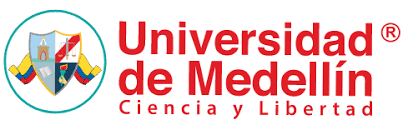

**Integrantes:**

- John Freddy Ossa Patiño
- Maria Camila Morales Mejia
- Juan Diego Altamar Tovar
- Pablo Emilio Troncoso Romero


#### A continuación realizaremos el Análisis Exploratorio de Datos EDA con el fin de validar y verificar la información a través de la estadística descriptiva para posteriormente realizar inferencia sobre la población objetivo.

# **1. Presentación de los datos**

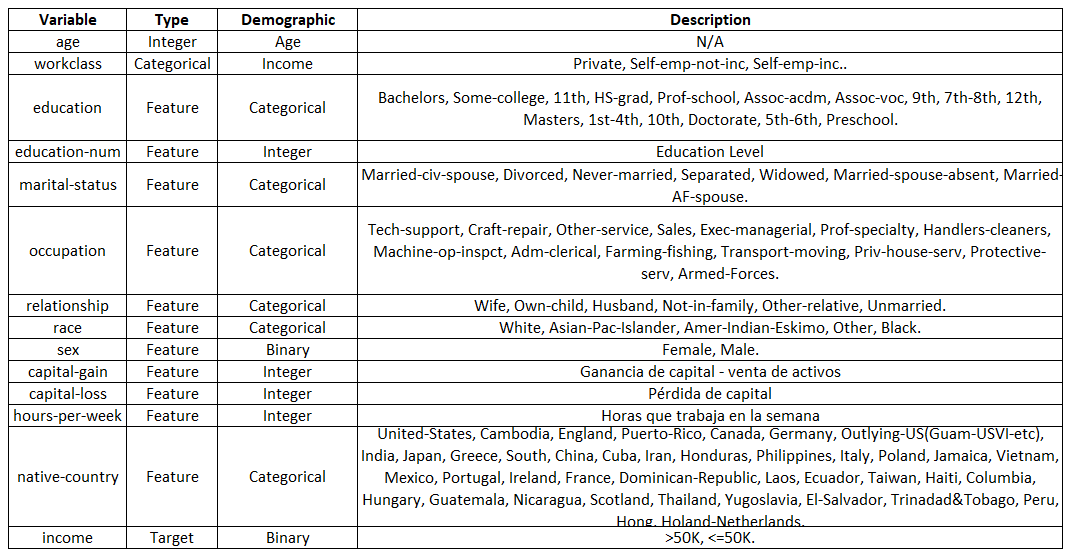

In [2]:
import pandas as pd
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay,
    RocCurveDisplay, roc_auc_score, classification_report,
    roc_curve, RocCurveDisplay, auc
)
import statsmodels.api as sm
from statsmodels.sandbox.stats.runs import runstest_1samp
from scipy import stats
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
adult = fetch_ucirepo(id=2) 

In [4]:
print(adult.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [5]:
df = pd.concat([adult.data.features, adult.data.targets], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
# Información básica del dataset
print("=== INFORMACIÓN GENERAL ===")
print(f"Dimensiones: {df.shape}")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n=== TIPOS DE DATOS ===")
print(df.dtypes)
print("\n=== INFORMACIÓN DEL DATASET ===")
df.info()

=== INFORMACIÓN GENERAL ===
Dimensiones: (48842, 15)
Memoria utilizada: 26.45 MB

=== TIPOS DE DATOS ===
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupat

In [7]:
# Estadísticas descriptivas para variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
df.describe()

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
# Estadísticas descriptivas para variables categóricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Valores únicos: {df[col].nunique()}")
    print(f"  Valores más frecuentes:")
    print(df[col].value_counts().head())

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===

workclass:
  Valores únicos: 9
  Valores más frecuentes:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Name: count, dtype: int64

education:
  Valores únicos: 16
  Valores más frecuentes:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

marital-status:
  Valores únicos: 7
  Valores más frecuentes:
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

occupation:
  Valores únicos: 15
  Valores más frecuentes:
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

relationship:
  Valores únicos: 6
  Valores más fre

=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===
Conteos absolutos:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Proporciones:
income
<=50K     0.506122
<=50K.    0.254596
>50K      0.160538
>50K.     0.078744
Name: proportion, dtype: float64


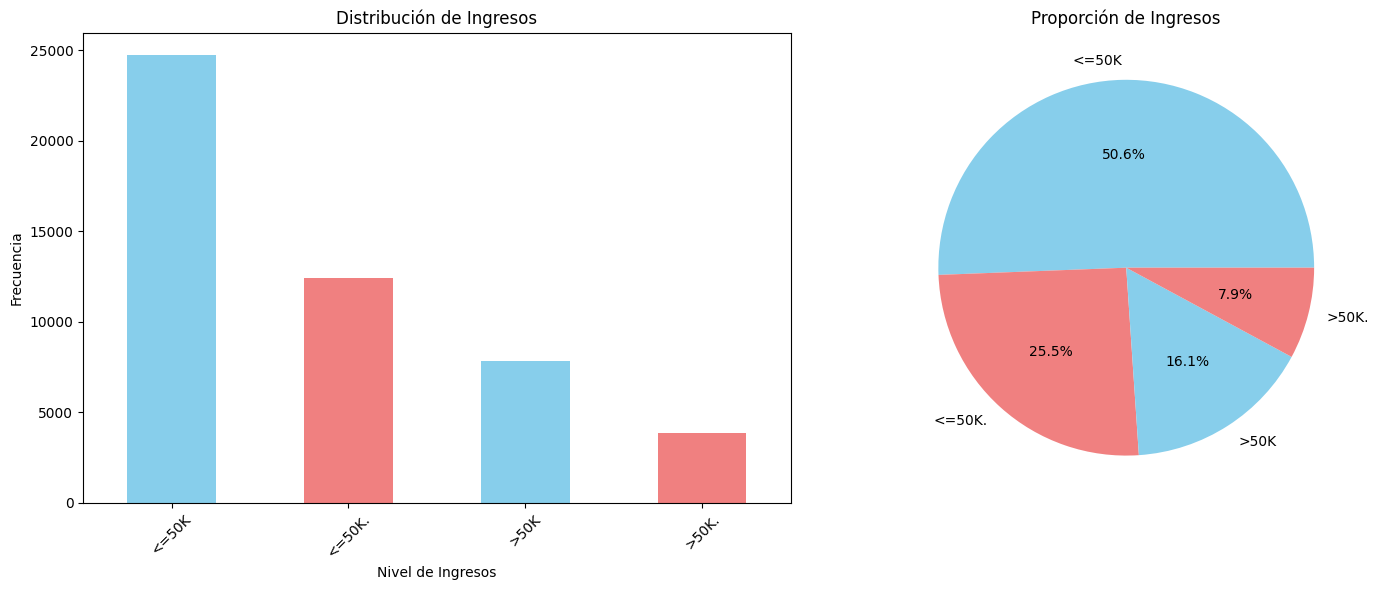

In [9]:
# Análisis de la variable objetivo
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
target_counts = df['income'].value_counts()
target_props = df['income'].value_counts(normalize=True)

print("Conteos absolutos:")
print(target_counts)
print("\nProporciones:")
print(target_props)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
target_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Distribución de Ingresos')
axes[0].set_xlabel('Nivel de Ingresos')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de pastel
target_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Proporción de Ingresos')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Variables numéricas: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


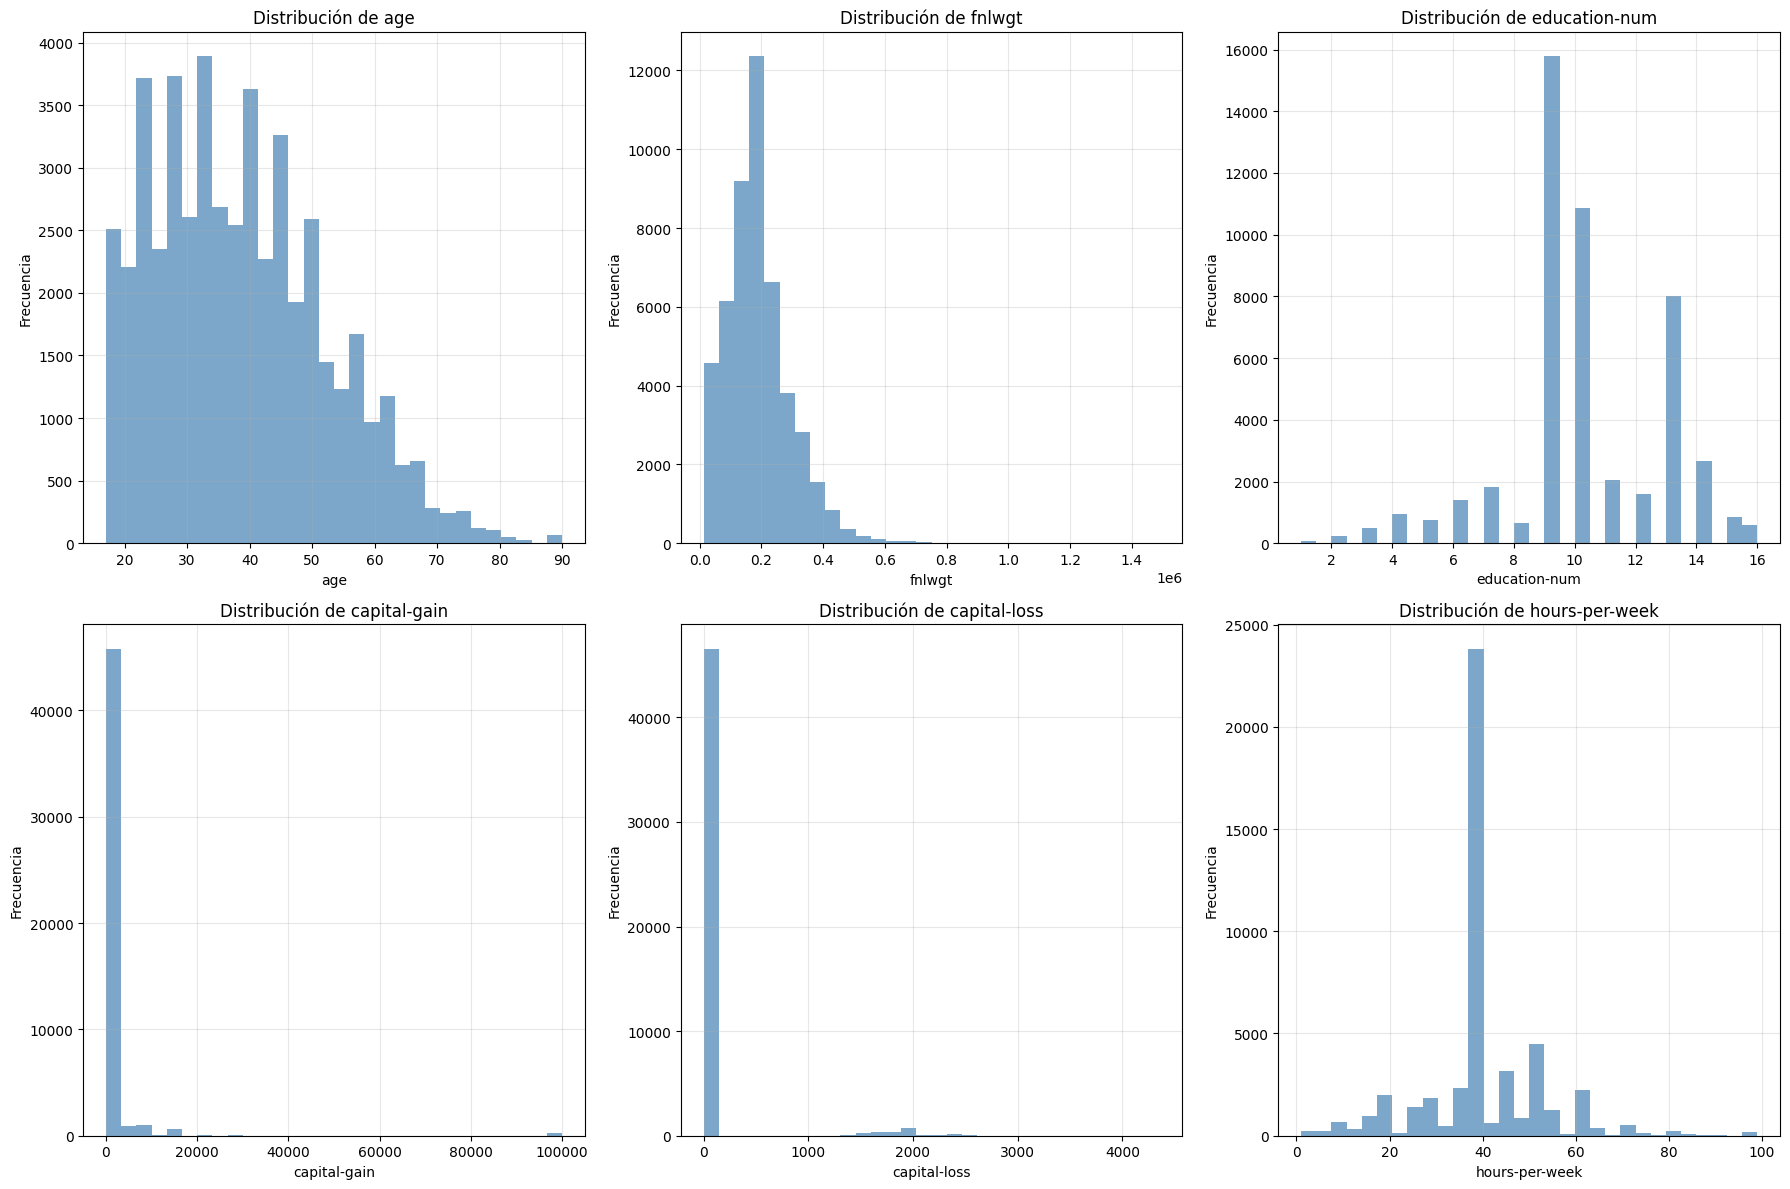

In [10]:
# Análisis de variables numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Variables numéricas: {list(numerical_cols)}")

# Histogramas de variables numéricas
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='steelblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

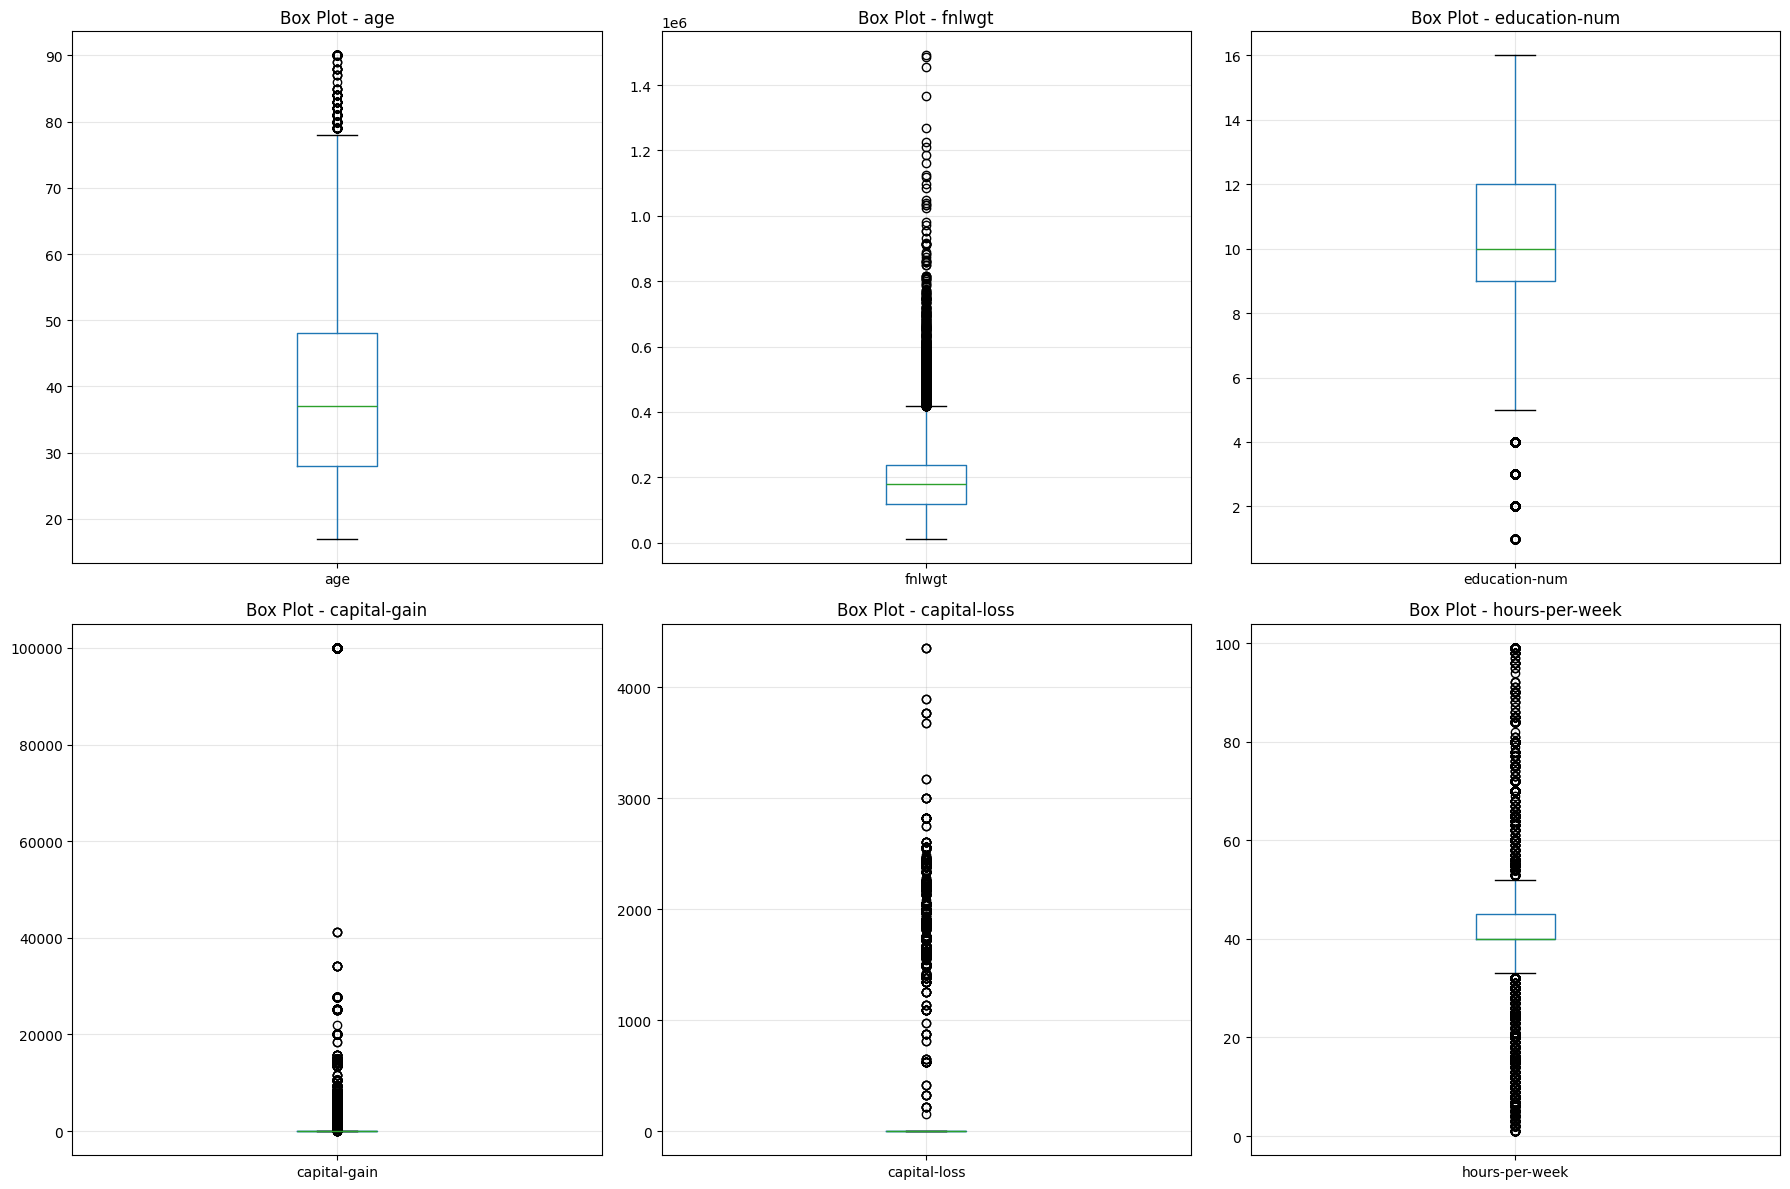

In [11]:
# Box plots para identificar outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box Plot - {col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Estadísticas descriptivas para variables categóricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Valores únicos: {df[col].nunique()}")
    print(f"  Valores más frecuentes:")
    print(df[col].value_counts().head())

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS ===

workclass:
  Valores únicos: 9
  Valores más frecuentes:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Name: count, dtype: int64

education:
  Valores únicos: 16
  Valores más frecuentes:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

marital-status:
  Valores únicos: 7
  Valores más frecuentes:
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

occupation:
  Valores únicos: 15
  Valores más frecuentes:
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

relationship:
  Valores únicos: 6
  Valores más fre

Variables categóricas: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


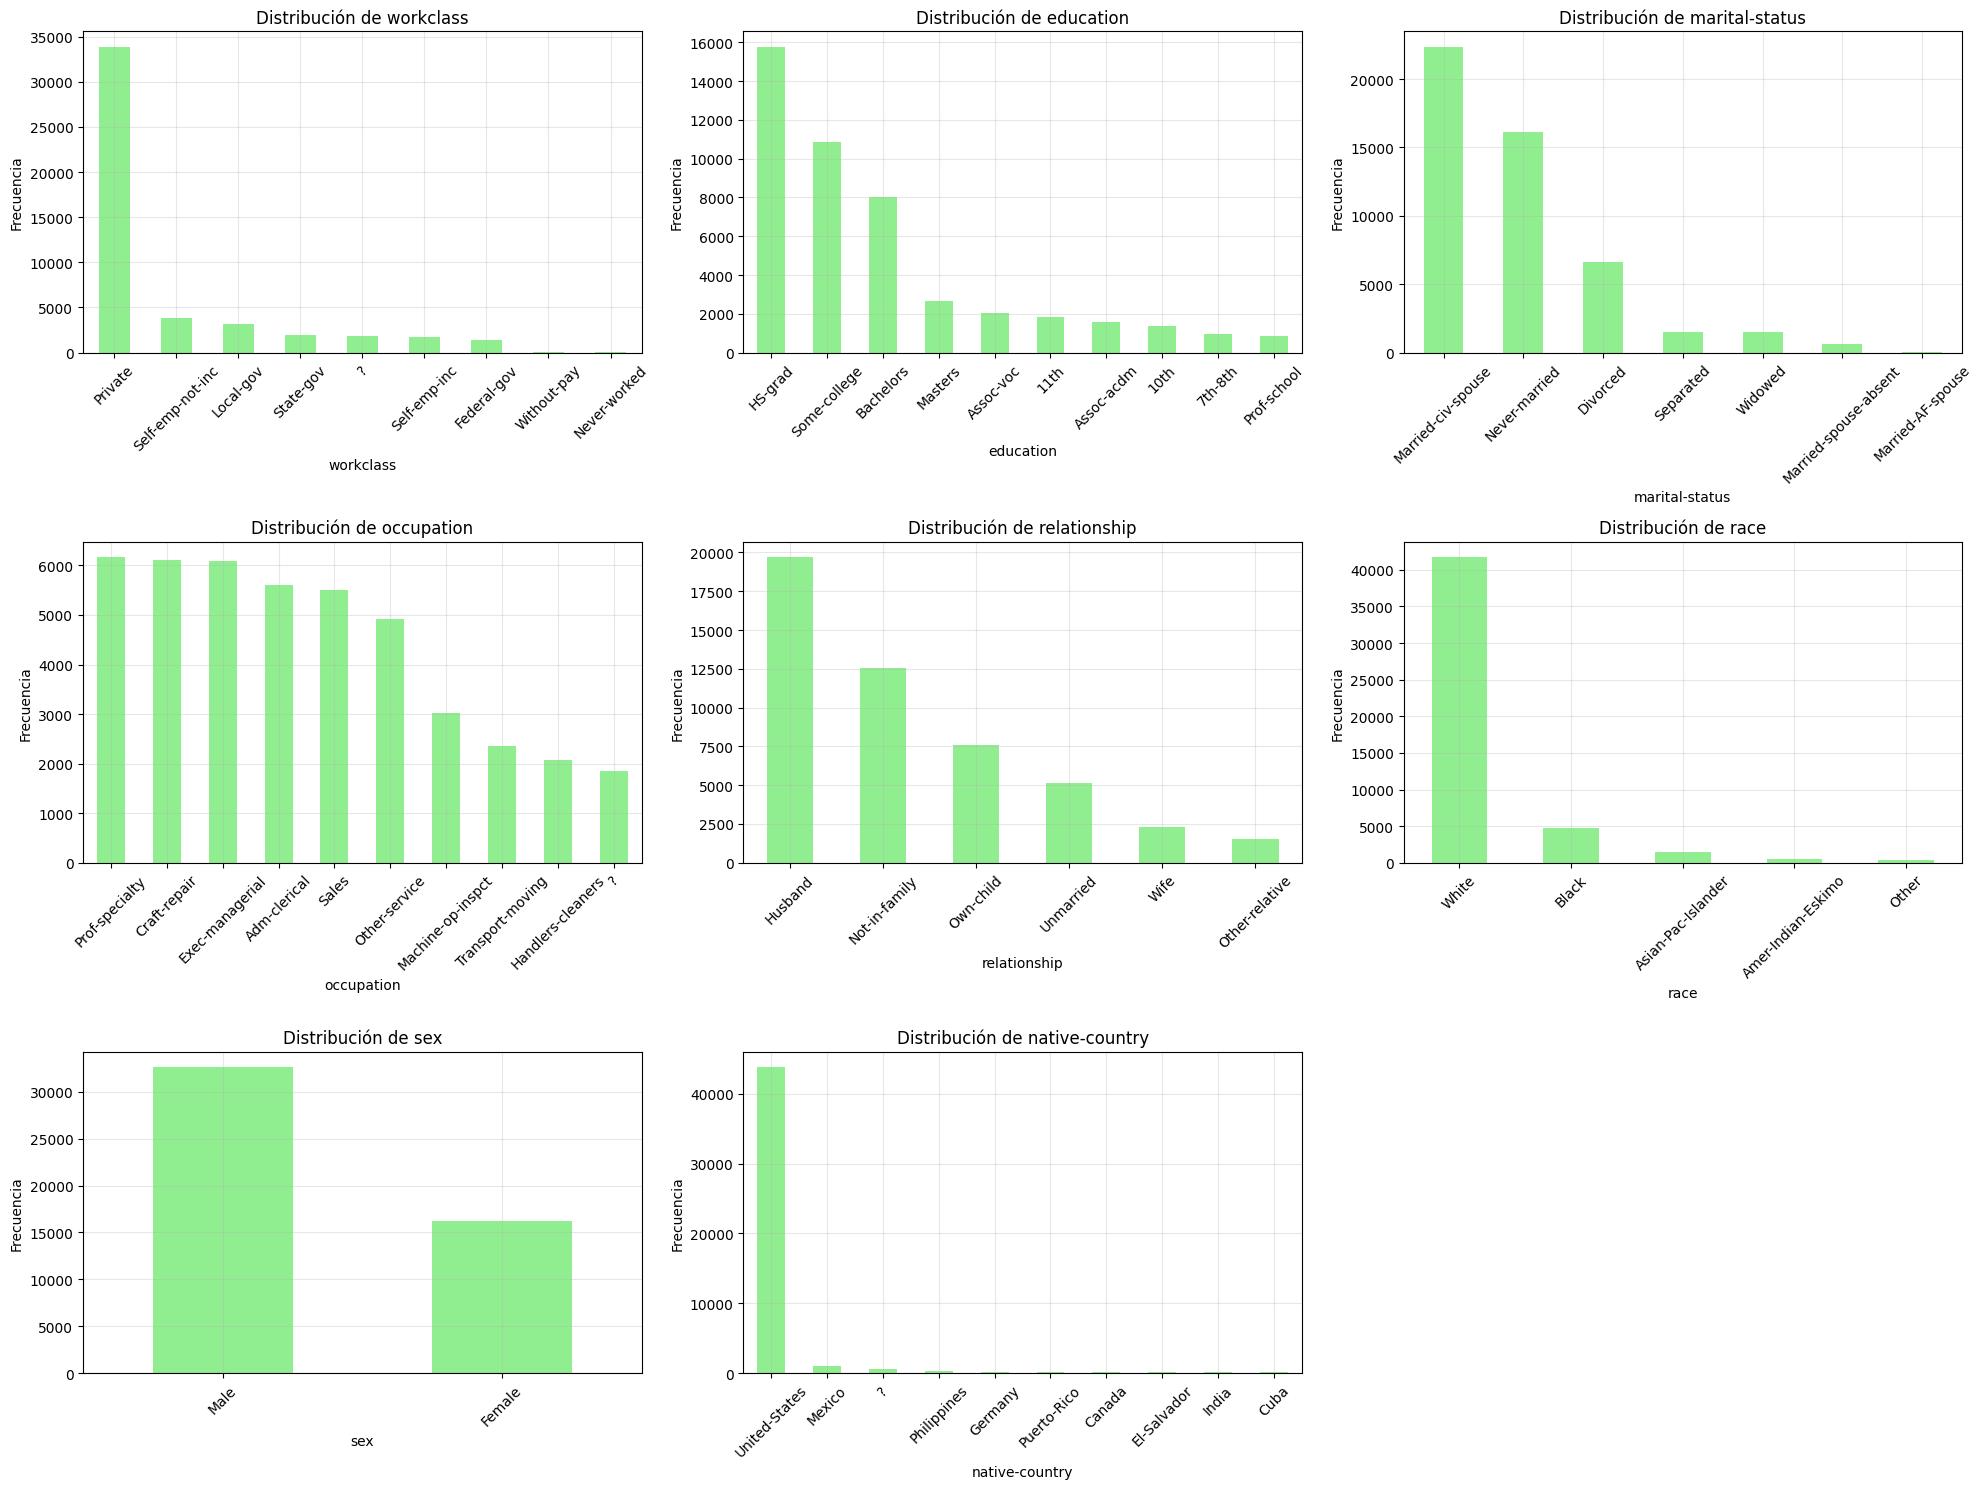

In [13]:
# Análisis de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'income']  # Excluir target

print(f"Variables categóricas: {list(categorical_cols)}")

# Crear subplots para variables categóricas
n_cols = len(categorical_cols)
n_rows = (n_cols + 2) // 3

fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    
    # Mostrar solo los top 10 para variables con muchas categorías
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
    
    value_counts.plot(kind='bar', ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

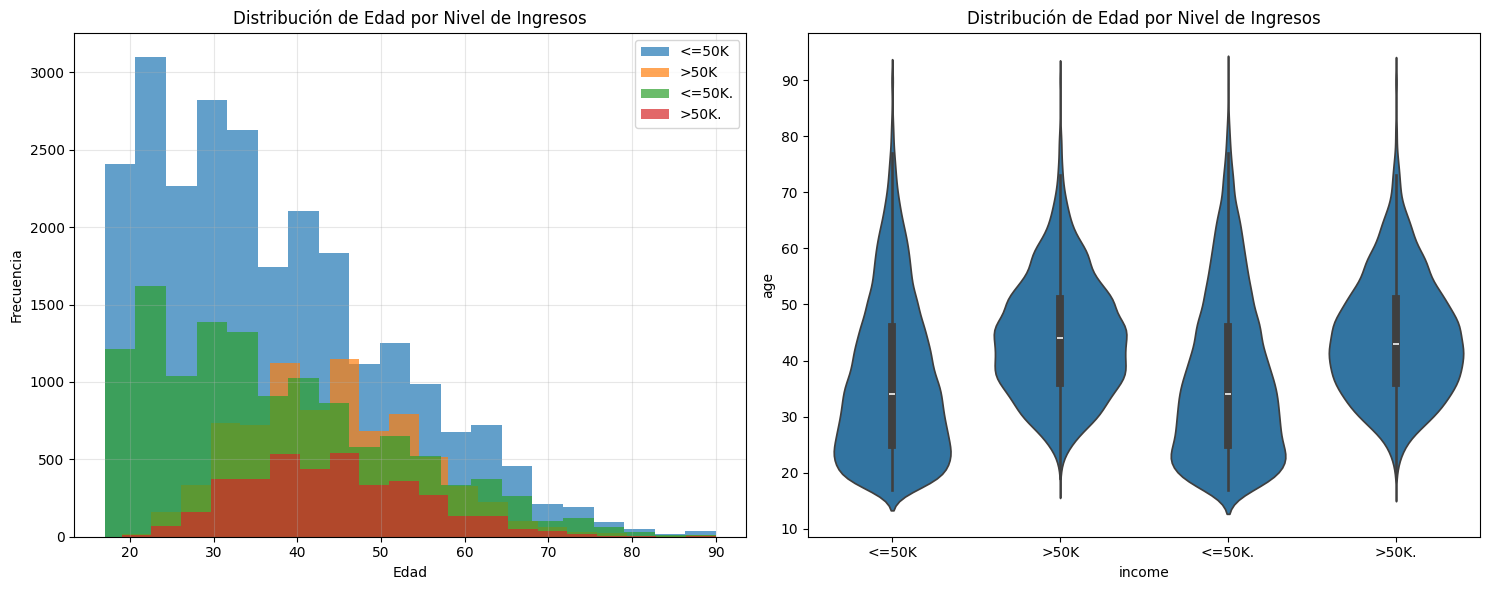

In [14]:
# Análisis de edad por nivel de ingresos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histograma superpuesto
for income_level in df['income'].unique():
    subset = df[df['income'] == income_level]
    axes[0].hist(subset['age'], bins=20, alpha=0.7, label=income_level)

axes[0].set_title('Distribución de Edad por Nivel de Ingresos')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='income', y='age', ax=axes[1])
axes[1].set_title('Distribución de Edad por Nivel de Ingresos')

plt.tight_layout()
plt.show()

=== ANÁLISIS DE VALORES FALTANTES ===
Variables con valores faltantes:
                Missing_Count  Missing_Percentage
occupation                966            1.977806
workclass                 963            1.971664
native-country            274            0.560993


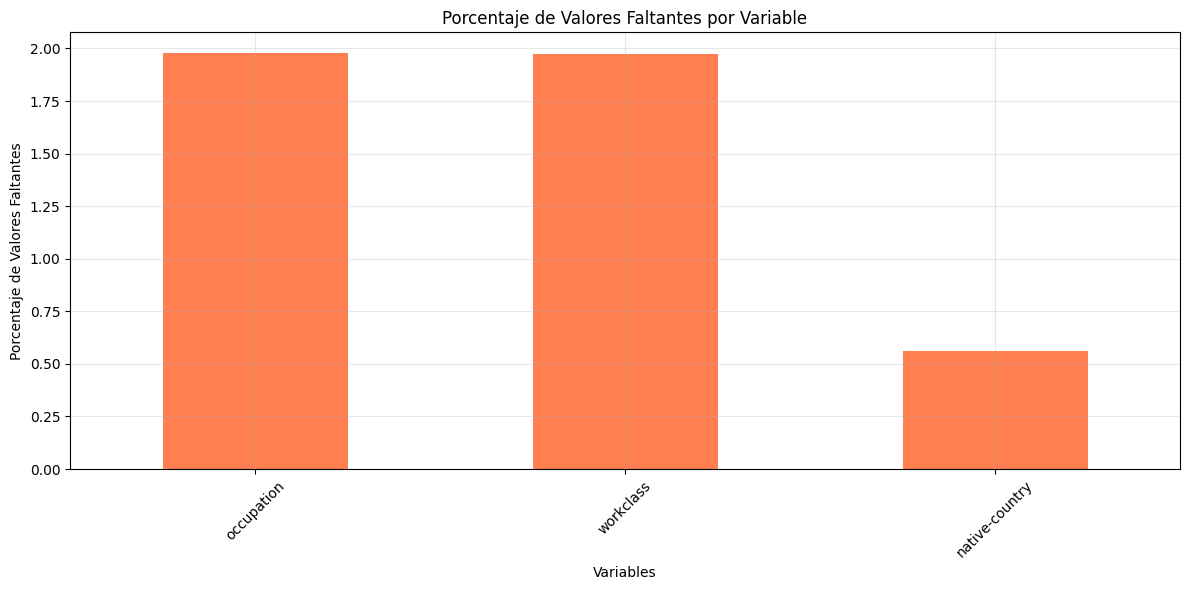


=== BÚSQUEDA DE VALORES '?' (POSIBLES VALORES FALTANTES) ===
Variables con valores '?':
workclass: 1836 (3.76%)
occupation: 1843 (3.77%)
native-country: 583 (1.19%)


In [15]:
# Análisis de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")

# Contar valores nulos
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percentage': missing_percentages
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Variables con valores faltantes:")
    print(missing_df)
    
    # Visualización de valores faltantes
    plt.figure(figsize=(12, 6))
    missing_df['Missing_Percentage'].plot(kind='bar', color='coral')
    plt.title('Porcentaje de Valores Faltantes por Variable')
    plt.xlabel('Variables')
    plt.ylabel('Porcentaje de Valores Faltantes')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron valores faltantes explícitos (NaN)")

# Buscar valores '?' que pueden representar valores faltantes
print("\n=== BÚSQUEDA DE VALORES '?' (POSIBLES VALORES FALTANTES) ===")
question_marks = {}
for col in df.select_dtypes(include=['object']).columns:
    count = (df[col] == '?').sum()
    if count > 0:
        question_marks[col] = count

if question_marks:
    print("Variables con valores '?':")
    for col, count in question_marks.items():
        percentage = (count / len(df)) * 100
        print(f"{col}: {count} ({percentage:.2f}%)")
else:
    print("No se encontraron valores '?' en el dataset")

=== ANÁLISIS DE OUTLIERS (MÉTODO IQR) ===
         Variable  Outliers_Count  Outliers_Percentage  Lower_Bound  \
0             age             216             0.442242        -2.00   
1          fnlwgt            1453             2.974899    -62586.75   
2   education-num            1794             3.673068         4.50   
3    capital-gain            4035             8.261332         0.00   
4    capital-loss            2282             4.672208         0.00   
5  hours-per-week           13496            27.631956        32.50   

   Upper_Bound  
0        78.00  
1    417779.25  
2        16.50  
3         0.00  
4         0.00  
5        52.50  


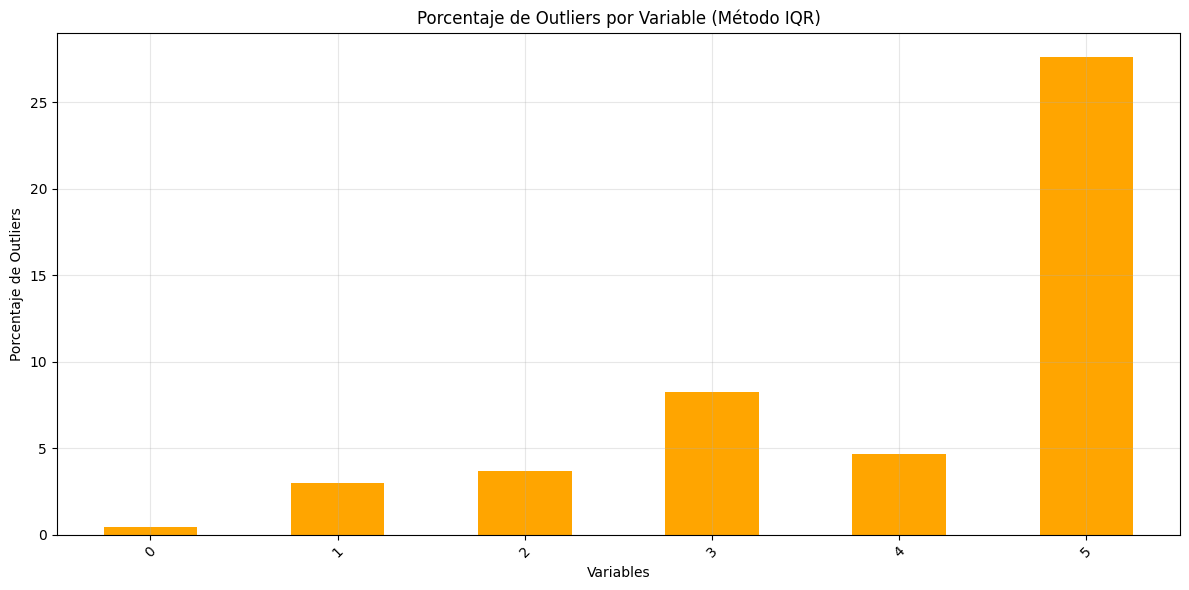

In [16]:
# Detección de outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== ANÁLISIS DE OUTLIERS (MÉTODO IQR) ===")

outlier_summary = []

for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Outliers_Count': outlier_count,
        'Outliers_Percentage': outlier_percentage,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

# Visualización de outliers
plt.figure(figsize=(12, 6))
outlier_df['Outliers_Percentage'].plot(kind='bar', color='orange')
plt.title('Porcentaje de Outliers por Variable (Método IQR)')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Outliers')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
variables = ['age','education-num','capital-gain','capital-loss','hours-per-week']
medida = pd.DataFrame(index=variables)
medida['Media'] = df[variables].mean()
medida['Mediana'] = df[variables].median()
medida['Moda'] = df[variables].mode().iloc[0]

# Mostrar la tabla
print(medida)

                      Media  Mediana  Moda
age               38.643585     37.0    36
education-num     10.078089     10.0     9
capital-gain    1079.067626      0.0     0
capital-loss      87.502314      0.0     0
hours-per-week    40.422382     40.0    40


In [18]:
# Creamos un resumen con medidas de variabilidad
variabilidad = pd.DataFrame({
    'Varianza': df[variables].var(),
    'Desviación estándar': np.sqrt(df[variables].var()),
    'Cte de Variacion': (np.sqrt(df[variables].var())/df[variables].mean())*100,
    'Rango': df[variables].max() - df[variables].min()
})

# Redondeamos los valores
variabilidad = variabilidad.round(2)

# Mostramos el resultado
print(variabilidad)

                   Varianza  Desviación estándar  Cte de Variacion  Rango
age                  187.98                13.71             35.48     73
education-num          6.61                 2.57             25.51     15
capital-gain    55532588.04              7452.02            690.60  99999
capital-loss      162412.67               403.00            460.56   4356
hours-per-week       153.55                12.39             30.65     98


In [19]:
# Calcular asimetría y curtosis
medidas_forma = pd.DataFrame({
    'Asimetría (Skewness)': df[variables].skew(),
    'Curtosis': df[variables].kurt()
})

print(medidas_forma)

                Asimetría (Skewness)    Curtosis
age                         0.557580   -0.184269
education-num              -0.316525    0.625745
capital-gain               11.894659  152.693096
capital-loss                4.569809   20.014346
hours-per-week              0.238750    2.951059


In [20]:
# Calcular medidas de posición (Cuartiles)
medidas_posicion = pd.DataFrame({
    'Q1': np.percentile(df[variables], 25, axis=0),
    'Q2': np.percentile(df[variables], 50, axis=0),
    'Q3': np.percentile(df[variables], 75, axis=0)
}, index=variables)

print("📊 Medidas de posición (cuartiles):\n")
print(medidas_posicion)
print("\n")

for var in variables:
    Q1 = medidas_posicion.loc[var, 'Q1']
    Q2 = medidas_posicion.loc[var, 'Q2']
    Q3 = medidas_posicion.loc[var, 'Q3']
    print(f"📈 Para la variable '{var}':")
    print(f"   - El 25% de los valores son menores o iguales a: {Q1:,.2f}")
    print(f"   - El 50% de los valores (mediana) son menores o iguales a: {Q2:,.2f}")
    print(f"   - El 75% de los valores son menores o iguales a: {Q3:,.2f}")
    print("-" * 70)

📊 Medidas de posición (cuartiles):

                  Q1    Q2    Q3
age             28.0  37.0  48.0
education-num    9.0  10.0  12.0
capital-gain     0.0   0.0   0.0
capital-loss     0.0   0.0   0.0
hours-per-week  40.0  40.0  45.0


📈 Para la variable 'age':
   - El 25% de los valores son menores o iguales a: 28.00
   - El 50% de los valores (mediana) son menores o iguales a: 37.00
   - El 75% de los valores son menores o iguales a: 48.00
----------------------------------------------------------------------
📈 Para la variable 'education-num':
   - El 25% de los valores son menores o iguales a: 9.00
   - El 50% de los valores (mediana) son menores o iguales a: 10.00
   - El 75% de los valores son menores o iguales a: 12.00
----------------------------------------------------------------------
📈 Para la variable 'capital-gain':
   - El 25% de los valores son menores o iguales a: 0.00
   - El 50% de los valores (mediana) son menores o iguales a: 0.00
   - El 75% de los valores son men

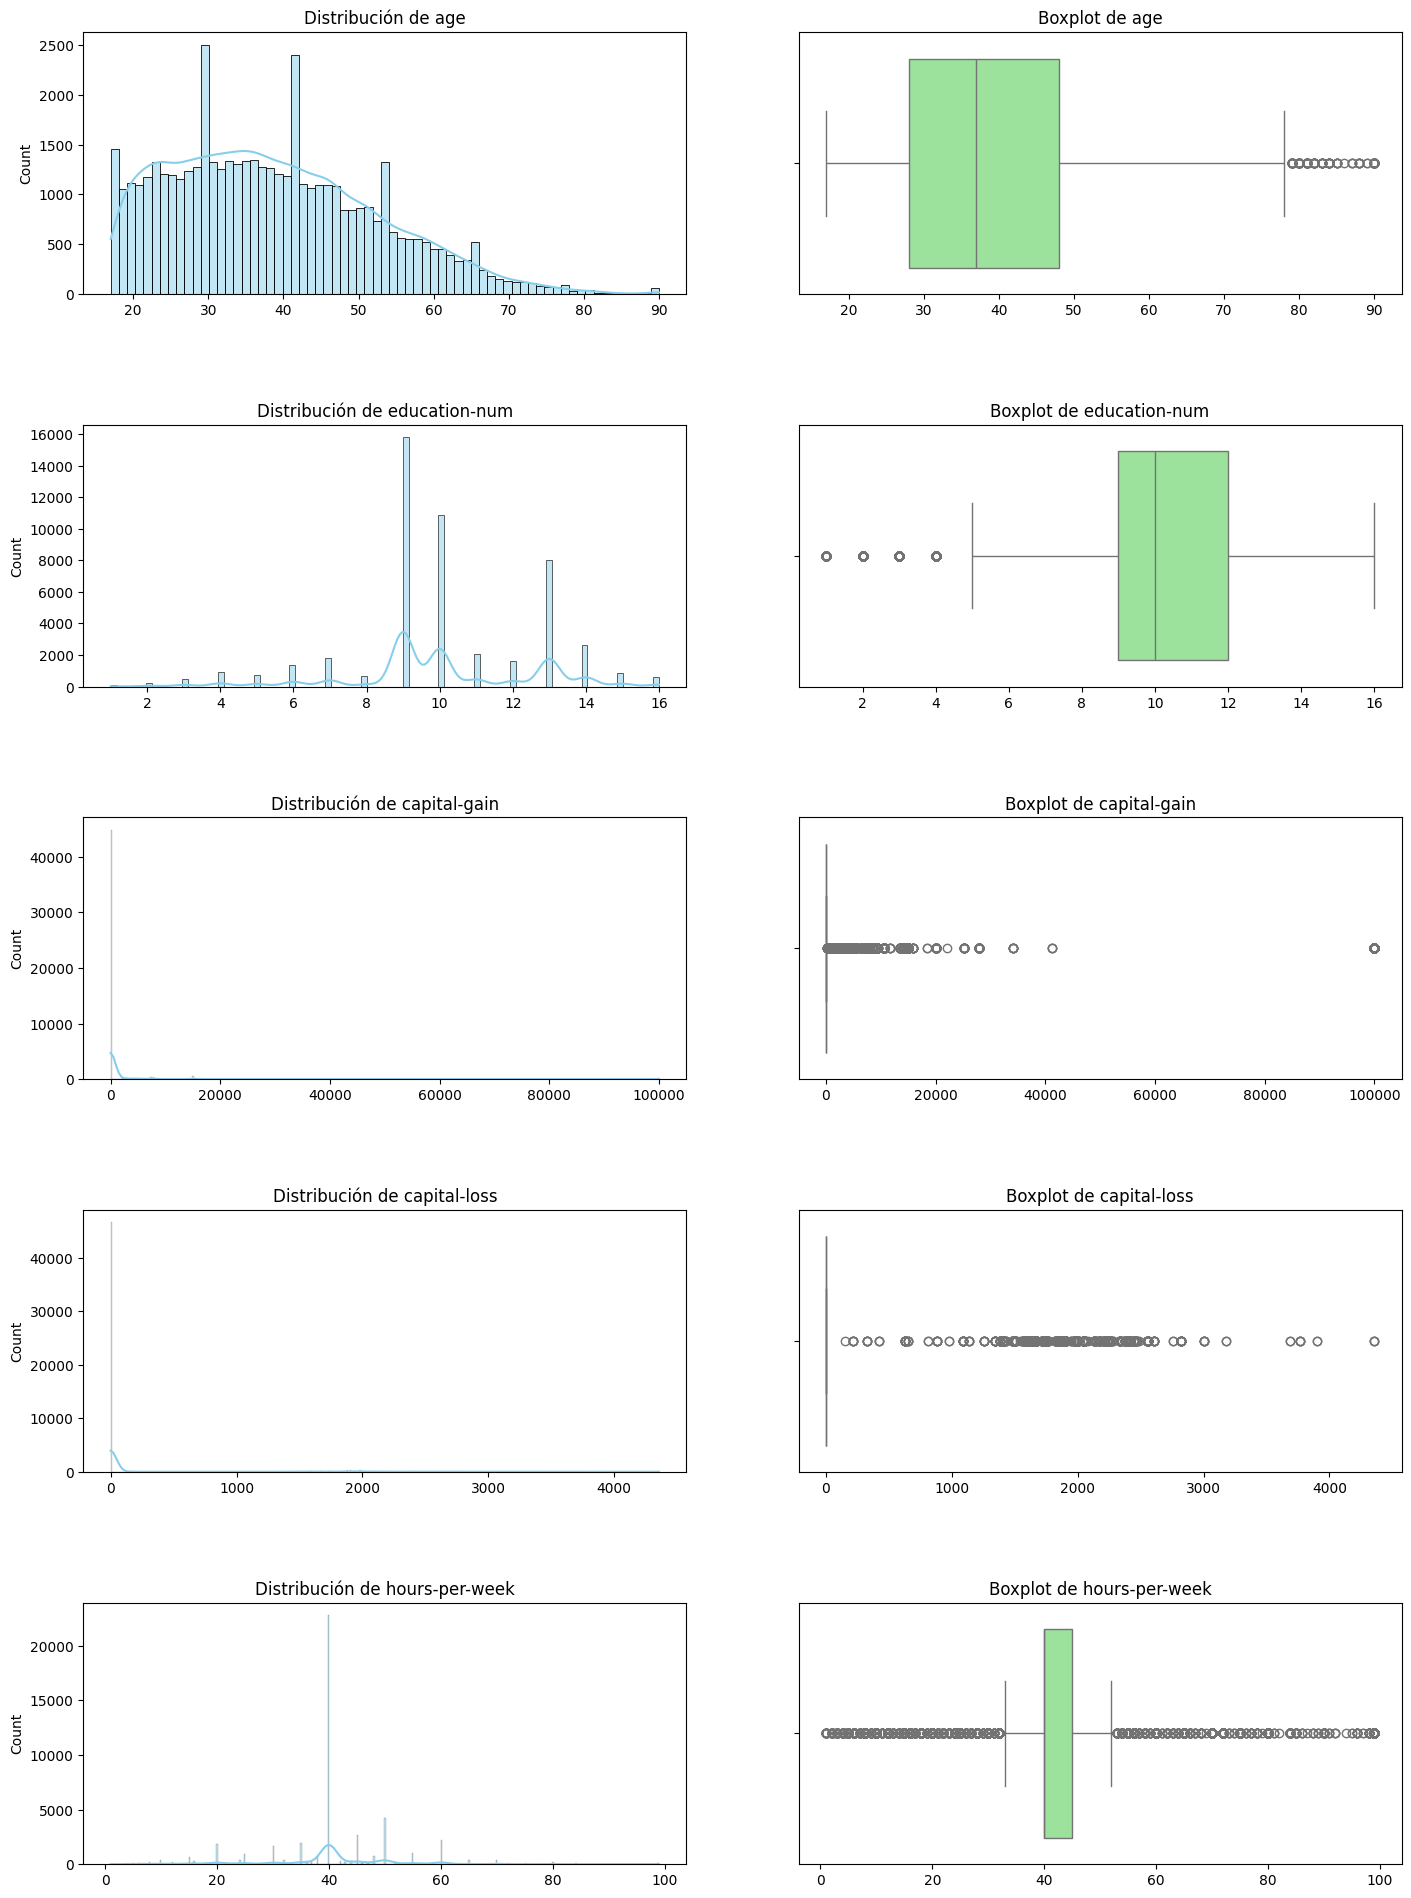

In [21]:
# Lista de variables numéricas para graficar

# Crear figura de subplots
fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(15, len(variables)*4))
fig.tight_layout(pad=5.0)

# Generar gráficos
for i, var in enumerate(variables):
    # Histograma + KDE
    sns.histplot(df[var], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribución de {var}')
    axes[i, 0].set_xlabel('')

    # Boxplot
    sns.boxplot(x=df[var], ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot de {var}')
    axes[i, 1].set_xlabel('')

plt.subplots_adjust(hspace=0.5)
plt.show()

Medidas y gráficas descriptivas multivariadas

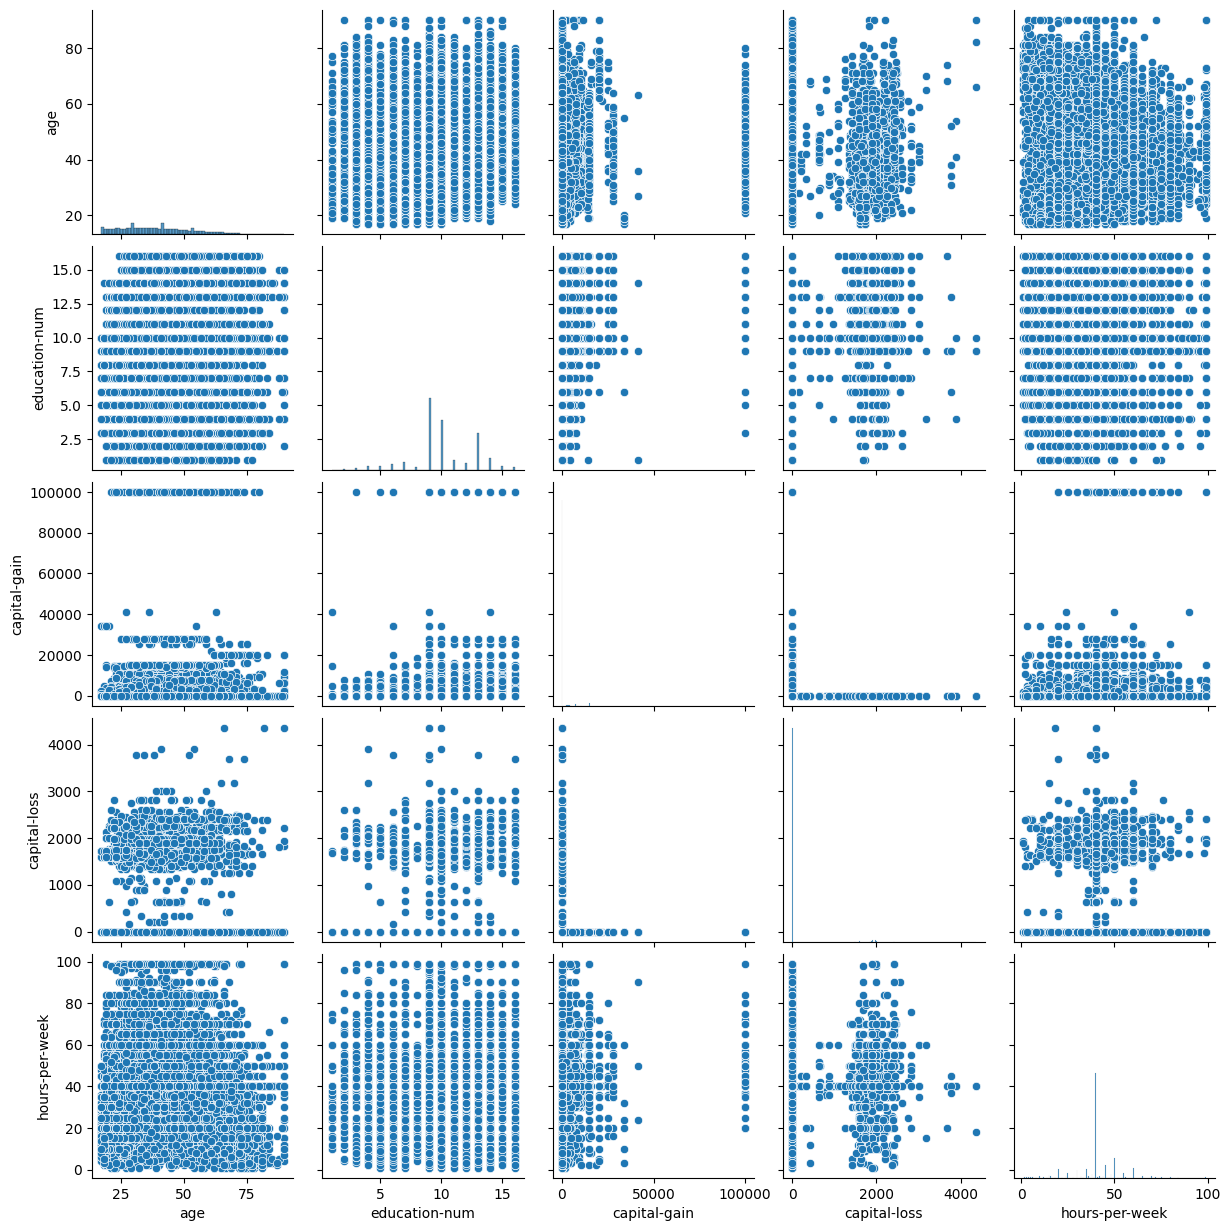

In [22]:
#Se toman todas las variables para revisar la correlación
continuas=df[variables]
sns.pairplot(continuas)

In [23]:
#Matriz de correlación
correlacion_matrix = continuas.corr()
continuas.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.030940,0.077229,0.056944,0.071558
education-num,0.030940,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,0.143689,0.082157,0.054467,1.000000


<Axes: >

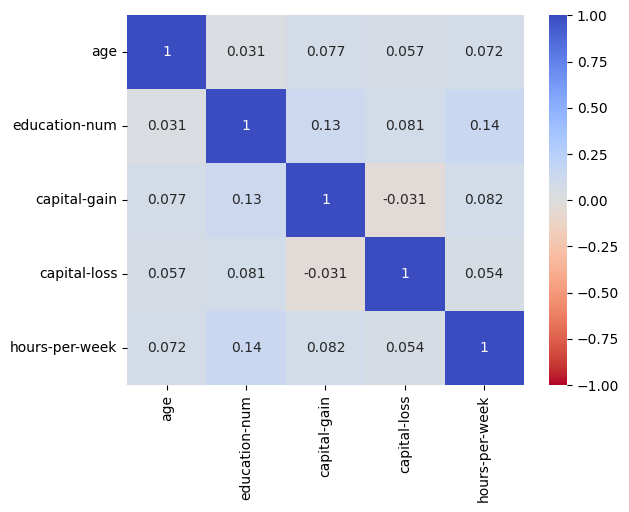

In [24]:
sns.heatmap(correlacion_matrix, annot=True, cmap="coolwarm_r",center=0, vmin=-1, vmax=1)

## Análisis del EDA.


*   **Variable Objetivo (Ingresos):** Encontramos que la variable que queremos predecir ('income') está desbalanceada. Aproximadamente el **76.07%** de los individuos tienen ingresos <=50K y el **23.93%** tienen ingresos >50K . 
Esto es crucial porque los modelos predictivos pueden tener dificultades para aprender a identificar correctamente la clase minoritaria (>50K) si no se maneja adecuadamente.

*   **Datos Faltantes:** Identificamos que hay información incompleta en el dataset. Algunas columnas, específicamente 'workclass', 'occupation' y 'native-country', tienen valores faltantes representados tanto por el valor estándar de "NaN" como por el carácter '?'. Por ejemplo, 'workclass' tiene **963 NaN (1.97%)** y **1836 '?' (3.76%)**. 'occupation' tiene **966 NaN (1.98%)** y **1843 '?' (3.77%)**. 'native-country' tiene **274 NaN (0.56%)** y **583 '?' (1.19%)**. La presencia de estos valores requiere un paso de limpieza de datos antes de poder utilizar estas columnas en un modelo.

*   **Características Numéricas:** Al analizar las variables numéricas, observamos que varias de ellas tienen distribuciones muy concentradas en un extremo (sesgadas) y contienen muchos valores extremos o "outliers" (detectados con el método IQR). Por ejemplo:
    *   'fnlwgt' tiene **1453 outliers (2.97%)**.
    *   'capital-gain' tiene **4035 outliers (8.26%)**.
    *   'capital-loss' tiene **2282 outliers (4.67%)**.
    *   'hours-per-week' tiene una cantidad significativa de outliers, con **13496 (27.63%)** fuera de los límites del IQR. La variable 'age' y 'education-num' también presentan outliers, pero en menor porcentaje (**0.44%** y **3.67%** respectivamente). Estas características pueden afectar el rendimiento de algunos algoritmos de machine learning, por lo que podría ser necesario transformar o tratar estos valores.

*   **Relación entre Edad e Ingresos:** Exploramos si la edad influye en los ingresos y los resultados sugieren que sí. Los histogramas superpuestos y violin plots mostraron visualmente que las personas con ingresos más altos tienden a ser mayores en promedio que aquellas con ingresos bajos. Esto indica que la edad será una característica importante a considerar en el modelo predictivo.

*   **Relación entre Variables Numéricas:** Evaluamos la relación lineal entre las variables numéricas mediante la matriz de correlación. Encontramos que, en su mayoría, no están fuertemente correlacionadas entre sí. Por ejemplo, la correlación entre 'age' y 'income' (aunque 'income' es categórica, la relación con variables numéricas es relevante para el modelado) no es muy alta, ni tampoco entre la mayoría de las variables numéricas predictoras. La correlación más alta observada fue entre 'education-num' y 'hours-per-week', con un valor de correlación de aproximadamente **0.14**. Esto es una buena señal, ya que una alta correlación entre variables predictoras (multicolinealidad) puede ser un problema para algunos modelos.

En conclusión, el EDA nos muestra que necesitamos realizar pasos de preprocesamiento importantes, como manejar los datos faltantes (considerando tanto NaN como '?'), abordar el desbalance en la variable objetivo y gestionar las características de las variables numéricas que presentan sesgo y outliers significativos. Estos pasos son esenciales para preparar los datos y construir un modelo de machine learning efectivo para predecir los ingresos.

# **2. Imputaciones de variables** 

In [25]:
df.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Imputaciones variables categoricas - Con la Moda

In [26]:
for col in ['workclass','occupation','native-country']:
    moda = df[col].mode()[0]
    df[col] = df[col].replace('?', moda)

for col in ['workclass','occupation','native-country']:
    moda = df[col].mode()[0]
    df[col].fillna(moda, inplace=True)

C:\Users\diana\AppData\Local\Temp\ipykernel_24988\4120990020.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


In [27]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# **3. Data processing:**

In [28]:
# 1) Normaliza la etiqueta: quita espacios y punto final
df['income_clean'] = (
    df['income']
      .astype(str)
      .str.strip()                 # quita espacios al inicio/fin
      .str.replace(r'\.$', '', regex=True)   # elimina punto final si existe
)

# Verifica
print(df['income_clean'].value_counts(dropna=False))

#Reemplazar 
df['income_bin'] = df['income_clean'].map({'>50K': 1, '<=50K': 0})

# Comprueba que no queden NaN por categorías no previstas
print(df['income_bin'].value_counts(dropna=False))


income_clean
<=50K    37155
>50K     11687
Name: count, dtype: int64
income_bin
0    37155
1    11687
Name: count, dtype: int64


Validamos que no quedemos con datos faltantes

In [29]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
income_clean      0
income_bin        0
dtype: int64

## **3.1 Convertir datos**

In [30]:
base = df.copy()

In [31]:
features_num = ['age','education-num','capital-gain','capital-loss','hours-per-week']
features_cat = ['workclass','marital-status','occupation','relationship','sex','native-country']
target = ['income_bin']

In [32]:
# Convertir texto a números, no se crean dicótmas por los grados de libertad: Este código reemplaza las categorías por valores numéricos (por ejemplo, 'Low' → 0, 'Medium' → 1, 'High' → 2, según el orden alfabético).
le = LabelEncoder()

# Aplicar LabelEncoder a cada columna
for col in features_cat:
    base[col] = le.fit_transform(base[col])
print(base.dtypes)

age                int64
workclass          int64
fnlwgt             int64
education         object
education-num      int64
marital-status     int64
occupation         int64
relationship       int64
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int64
income            object
income_clean      object
income_bin         int64
dtype: object


In [33]:
#Dividir datos de entrada y de salida
X = base[features_num + features_cat].copy()
y = base[target].copy()

Axes(0.125,0.11;0.62x0.77)


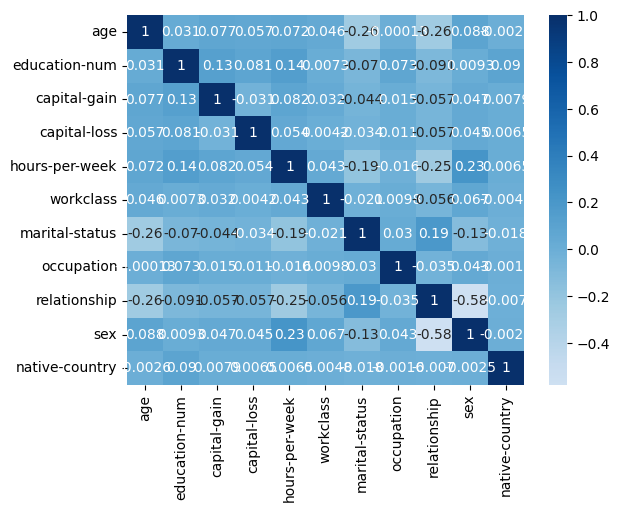

In [34]:
#Para TODOS los modelos se debe revisar la no existencia de Multicolinealidad
correlation_matrix = X.corr()
print(sns.heatmap(correlation_matrix, annot=True, cmap="Blues", center=0))

Como lo mencionamos en el análisis descriptivo, no tenemos altas correlaciones, por lo tanto, no tenemos problemas de multicolinealidad.

# **4. Modelos**

In [35]:
#Separar en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3.2 Balanceo variable objetivo**

In [36]:
y['income_bin'].value_counts(normalize=True) * 100

income_bin
0    76.071823
1    23.928177
Name: proportion, dtype: float64

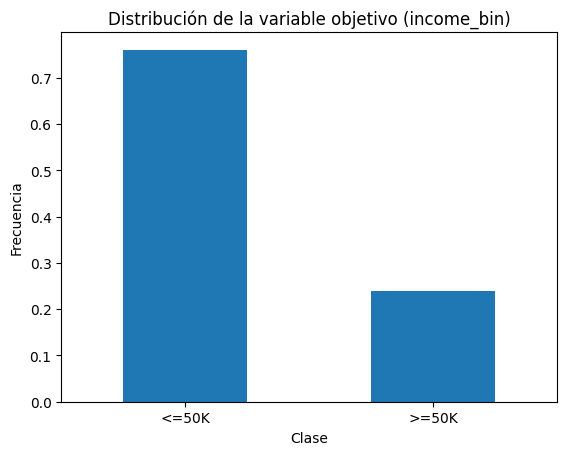

In [37]:
y['income_bin'].value_counts(normalize=True).plot(kind = 'bar')
plt.title('Distribución de la variable objetivo (income_bin)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['<=50K', '>=50K'], rotation = 0)
plt.show()

Como vemos en la gráfica, las clases estan desbalanceadas

In [38]:
#Balanceamos las clases Oversampling con SMOTE. Nos genera ejemplos sintéticos de la clase minoritaria.
# Balancear con SMOTE
smote = SMOTE(random_state=42)
X_train_bal, Y_train_bal = smote.fit_resample(X_train, Y_train)

## **3.3 Regresión logística**

In [39]:
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_bal, Y_train_bal)

C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [40]:
#El resumen del modelo logístico
X_sm = X_train_bal
y_sm = Y_train_bal

# Agregar la constante (intercepto)
X_sm = sm.add_constant(X_sm)

# Ajustar modelo logit con statsmodels
modelo_sm = sm.Logit(y_sm, X_sm)
resultado = modelo_sm.fit(disp=0)

# Obtener coeficientes y errores estándar
betas = resultado.params
std_err = resultado.bse

# Calcular estadístico Z
z_scores = betas / std_err

# Calcular valores p (bilaterales)
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# Crear tabla resumen
n_vars = X_sm.shape[1]
tabla = pd.DataFrame({
    'Variable': ['const'] + [f'x{i}' for i in range(1, n_vars)],
    'Coeficiente (β)': betas,
    'Error estándar': std_err,
    'Estadístico Z': z_scores,
    'P-valor': p_values
})

print(tabla)
# Coeficientes y odds ratios
coeficientes = modelo_log.coef_[0]  # array de coeficientes
odds_ratios = np.exp(coeficientes)  # exponentes

# Crear tabla con nombres de variables
summary_df = pd.DataFrame({
    'Variable': X_train_bal.columns if hasattr(X_train_bal, 'columns') else [f'x{i}' for i in range(X_train_bal.shape[1])],
    'Coeficiente': coeficientes,
    'Odds Ratio': odds_ratios
})

print(summary_df)

               Variable  Coeficiente (β)  Error estándar  Estadístico Z  \
const             const        -5.306447        0.115748     -45.844968   
age                  x1         0.035345        0.000906      39.032715   
education-num        x2         0.323791        0.004733      68.412922   
capital-gain         x3         0.000309        0.000007      42.149873   
capital-loss         x4         0.000685        0.000024      28.191183   
hours-per-week       x5         0.031069        0.000976      31.825300   
workclass            x6        -0.186975        0.009411     -19.867213   
marital-status       x7        -0.328291        0.008525     -38.508534   
occupation           x8        -0.011267        0.002585      -4.359013   
relationship         x9        -0.210915        0.009171     -22.998271   
sex                 x10         0.559351        0.032176      17.384243   
native-country      x11         0.002159        0.001796       1.202097   

                 P-valor

El valor p de la variable native-country es alto, la variable no le aporta a los ingresos

In [41]:
# El lambda de Wilks es el equivalente al ANOVA en los modelos de regresión lineal
resultado = modelo_sm.fit(disp=0)


ll_modelo = resultado.llf        # Log-likelihood del modelo ajustado
ll_nulo = resultado.llnull       # Log-likelihood del modelo nulo

lambda_wilks = exp(ll_nulo - ll_modelo)

print(f"Lambda de Wilks       : {lambda_wilks:.4f}")

Lambda de Wilks       : 0.0000


Como 0.0000>0.05, se considera que si existe un modelo logístico

El modelo logístico muestra que la variable "Native-Country" tiene un valor p 0.229326 > 0.05, por tanto se recomienda eliminarla de las variables independientes (la puedo omitir ya que no tenemos problemas de multicolinealidad)

In [42]:
X_train_bal.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'marital-status', 'occupation',
       'relationship', 'sex', 'native-country'],
      dtype='object')

In [43]:
#Se retira "stage" de X_train_bal y de X_test
X_train_bal.drop(columns='native-country', inplace=True)
X_test.drop(columns='native-country', inplace=True)
print('native-country' in X_train_bal.columns)  # Debe devolver False
print('native-country' in X_test.columns)
print(X_train_bal.columns)

False
False
Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass', 'marital-status', 'occupation',
       'relationship', 'sex'],
      dtype='object')


In [44]:
# 1. Ajustar modelo logístico sin native-country
X_sm = sm.add_constant(X_train_bal)  # agrega constante (intercepto)
modelo_sm = sm.Logit(Y_train_bal, X_sm)
resultado = modelo_sm.fit(disp=0)

# 2. Extraer estadísticas
betas = resultado.params
std_err = resultado.bse
z_scores = betas / std_err
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# 3. Ajustar modelo con scikit-learn para odds ratios
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train_bal, Y_train_bal)
odds_ratios = np.exp(modelo_log.coef_[0])

# 4. Unir todo en una sola tabla
variables = X_sm.columns  # incluye 'const'
odds_ratios_full = [np.nan] + list(odds_ratios)  # insertar NaN para el intercepto

tabla_final = pd.DataFrame({
    'Variable': variables,
    'Coeficiente (β)': betas,
    'Error estándar': std_err,
    'Estadístico Z': z_scores,
    'P-valor': p_values,
    'Odds Ratio': odds_ratios_full
})

# 5. Mostrar tabla
print(tabla_final)

C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                      Variable  Coeficiente (β)  Error estándar  \
const                    const        -5.228155        0.095560   
age                        age         0.035349        0.000906   
education-num    education-num         0.323802        0.004731   
capital-gain      capital-gain         0.000309        0.000007   
capital-loss      capital-loss         0.000685        0.000024   
hours-per-week  hours-per-week         0.031077        0.000976   
workclass            workclass        -0.187019        0.009412   
marital-status  marital-status        -0.328389        0.008525   
occupation          occupation        -0.011254        0.002585   
relationship      relationship        -0.210813        0.009171   
sex                        sex         0.559796        0.032174   

                Estadístico Z   P-valor  Odds Ratio  
const              -54.710605  0.000000         NaN  
age                 39.034403  0.000000    1.030755  
education-num       68.441065  0.

C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression



Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78      7414
           1       0.44      0.79      0.56      2355

    accuracy                           0.71      9769
   macro avg       0.67      0.73      0.67      9769
weighted avg       0.80      0.71      0.73      9769

------------------------------------------------------------------------------------------------------------------------
Accuracy: 70.673 %
------------------------------------------------------------------------------------------------------------------------


C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


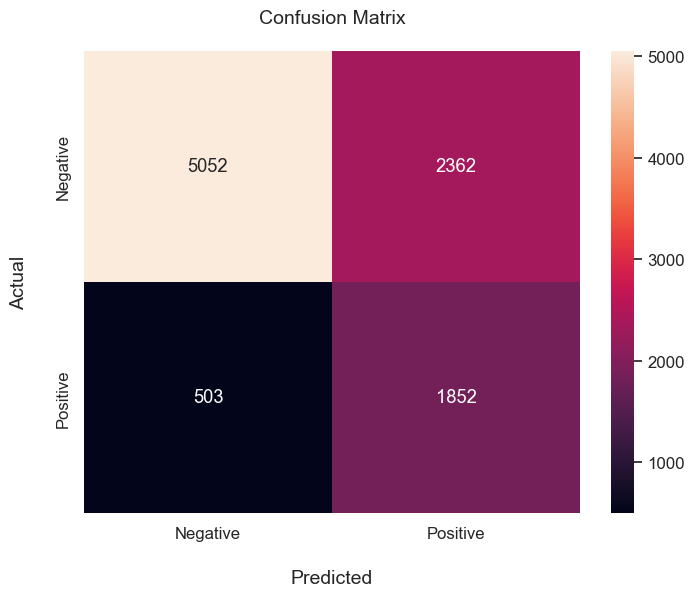

In [45]:
#Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_bal, Y_train_bal)

#Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print('Logistic Regression')
print('\n')

#Evaluación del modelo
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

#Precisión
print('---'*40)
print("Accuracy:", round(accuracy_score(Y_test, y_pred)*100,3), '%')

print('---'*40)
#Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.title("Matriz de Confusión - Regresión logística")
#plt.xlabel("Predicción")
#plt.ylabel("Real")
#plt.show()

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()


------------------------------------------------------------------------------------------------------------------------
ROC AUC Score: 0.8163743981232499


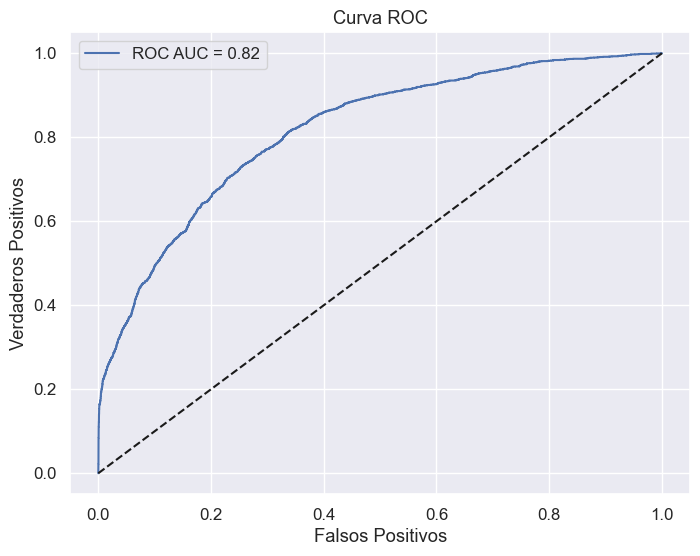

In [46]:
print('---'*40)
#Curva ROC
print("ROC AUC Score:", roc_auc_score(Y_test, y_proba))
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(Y_test, y_proba):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## **3.4 KNN**

In [47]:
# Create instance of model
knn = KNeighborsClassifier()

# Fit to training data
knn.fit(X_train_bal,Y_train_bal)

C:\Users\diana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_pred_knn = knn.predict(X_test)

K-Nearest Neighbors (KNN)
k = 5


--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      7414
           1       0.59      0.75      0.66      2355

    accuracy                           0.81      9769
   macro avg       0.75      0.79      0.77      9769
weighted avg       0.83      0.81      0.82      9769

--------------------------------------------------------------------------------
Accuracy 81.4 %


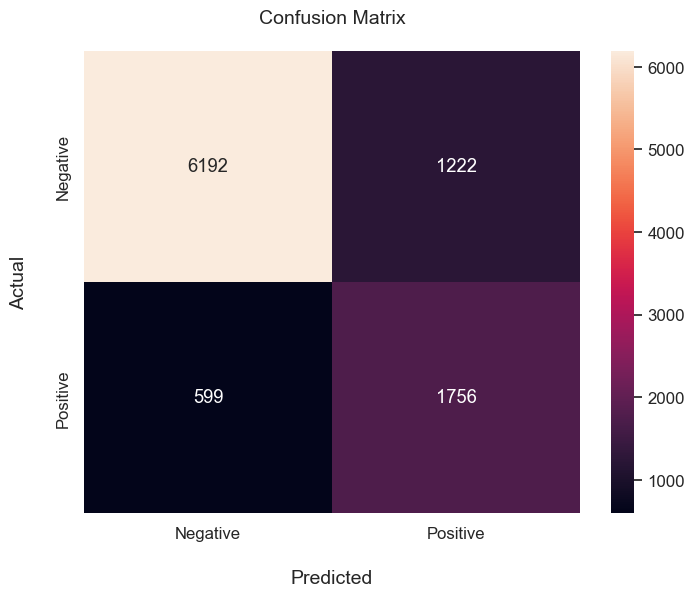

In [49]:
print('K-Nearest Neighbors (KNN)')
print('k = 5')
print('\n')

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(Y_test, y_pred_knn)

# Imprimir la matriz de confusión
#print('Confusion Matrix')
#print(conf_matrix)

# Mostrar el reporte de clasificación
print('--' * 40)
print('Classification Report')
print(classification_report(Y_test, y_pred_knn))

# Precisión
print('--' * 40)
knn_accuracy = round(accuracy_score(Y_test, y_pred_knn) * 100, 1)
print('Accuracy', knn_accuracy, '%')

# Graficar la matriz de confusión
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#plt.title('Matriz de Confusión - KNN')
#plt.xlabel("Predicción")
#plt.ylabel("Real")
#plt.show()

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()


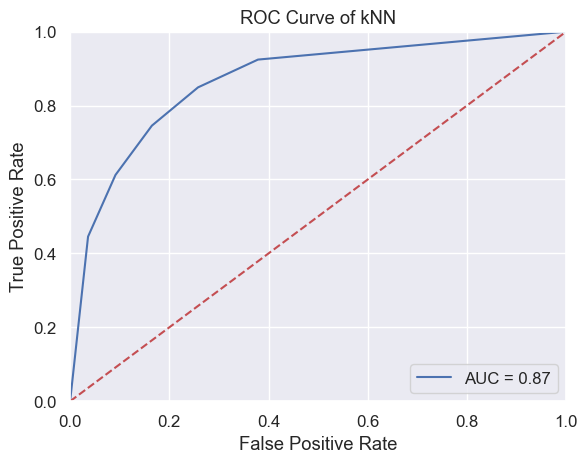

In [50]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

## **3.5 XGBoost**


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88      7414
           1       0.60      0.83      0.69      2355

    accuracy                           0.82      9769
   macro avg       0.77      0.83      0.79      9769
weighted avg       0.86      0.82      0.83      9769

------------------------------------------------------------------------------------------------------------------------
Accuracy: 82.38 %
------------------------------------------------------------------------------------------------------------------------


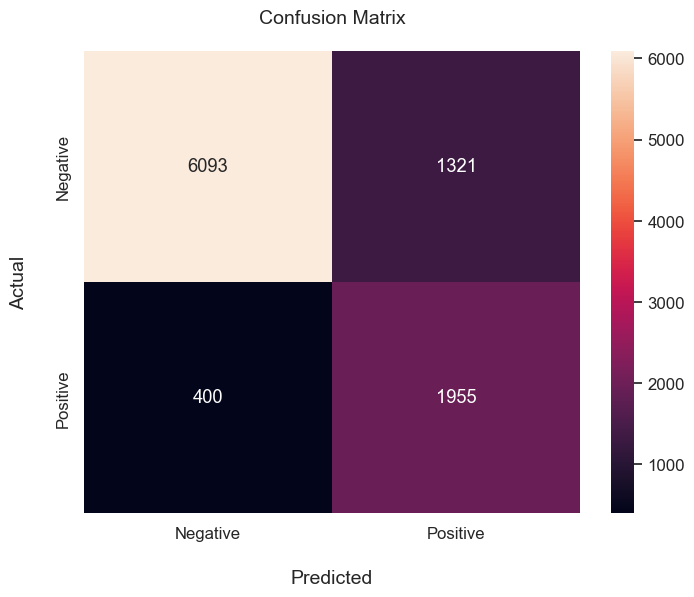

In [51]:
import xgboost

#train XGBoost model
xgb = xgboost.XGBClassifier(
    n_estimators=100,
    learning_rate=0.08,
    gamma=0,
    subsample=0.75,
    colsample_bytree=1,
    max_depth=7)
xgb.fit(X_train_bal,Y_train_bal.squeeze().values)

#calculate and print scores for the model for top 15 features
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

#Evaluación del modelo
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

#Precisión
print('---'*40)
print("Accuracy:", round(accuracy_score(Y_test, y_pred)*100,2), '%')

print('---'*40)
#Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#plt.title("Matriz de Confusión - Regresión logística")
#plt.xlabel("Predicción")
#plt.ylabel("Real")
#plt.show()

# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers.
ax = sns.heatmap(cm, annot=True, fmt='d', )

# set x-axis label and ticks.
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])

# set y-axis label and ticks
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])

# set plot title
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

plt.show()

------------------------------------------------------------------------------------------------------------------------
ROC AUC Score: 0.9181593095520781


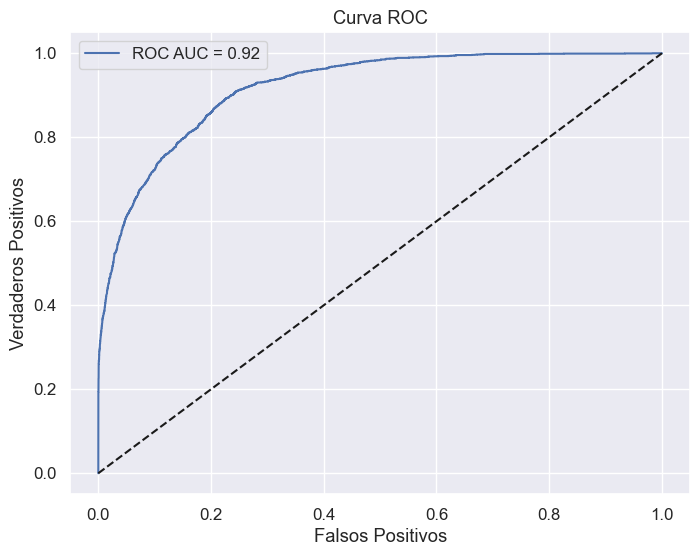

In [52]:
print('---'*40)
#Curva ROC
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob))
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(Y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## **3.6 RandomForest**


Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      7414
           1       0.57      0.82      0.67      2355

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769

------------------------------------------------------------------------------------------------------------------------
Accuracy: 80.6 %
------------------------------------------------------------------------------------------------------------------------


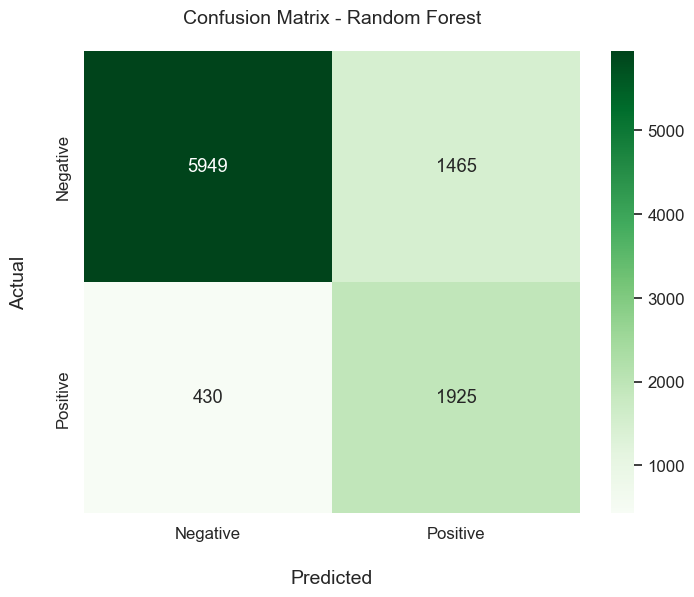

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,      
    max_depth=10,          
    min_samples_split=5,   
    min_samples_leaf=2,    
    max_features='sqrt',   
    bootstrap=True,        
    random_state=42,       
    n_jobs=-1              
)

# Entrenar el modelo
rf.fit(X_train_bal, Y_train_bal.squeeze().values)

# Predicciones
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report - Random Forest:\n", classification_report(Y_test, y_pred_rf))

print('---' * 40)
print("Accuracy:", round(accuracy_score(Y_test, y_pred_rf)*100, 2), '%')
print('---' * 40)

# Matriz de confusión
cm_rf = confusion_matrix(Y_test, y_pred_rf)

# Visualización
plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale=1.1)


ax = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_title("Confusion Matrix - Random Forest", fontsize=14, pad=20)

plt.show()

------------------------------------------------------------------------------------------------------------------------
ROC AUC Score: 0.9053870653844195


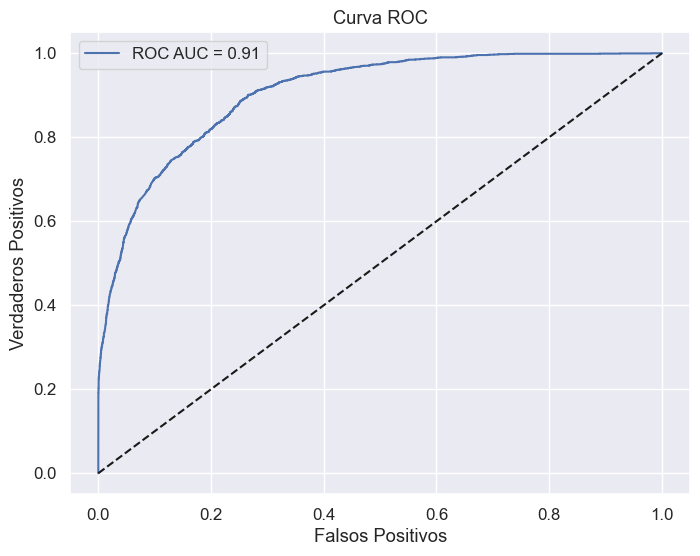

In [55]:
print('---'*40)
#Curva ROC
print("ROC AUC Score:", roc_auc_score(Y_test, y_prob_rf))
fpr, tpr, thresholds = roc_curve(Y_test, y_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_score(Y_test, y_prob_rf):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

# **5. Validación de modelos**

In [57]:
modelos = [
    {"Modelo": "KNN k=5", "Accuracy": 81.4, "F1 Score": 0.66, "ROC AUC": 0.87},
    {"Modelo": "Regresión logística", "Accuracy": 70.6, "F1 Score": 0.56, "ROC AUC": 0.82},
    {"Modelo": "XGBoost", "Accuracy": 82.4, "F1 Score": 0.70, "ROC AUC": 0.92},
    {"Modelo": "RandomForest", "Accuracy": 80.6, "F1 Score": 0.67, "ROC AUC": 0.91},
]
df_comparacion = pd.DataFrame(modelos)
df_comparacion

,Modelo,Accuracy,F1 Score,ROC AUC
0,KNN k=5,81.4,0.66,0.87
1,Regresión logística,70.6,0.56,0.82
2,XGBoost,82.4,0.70,0.92
3,RandomForest,80.6,0.67,0.91


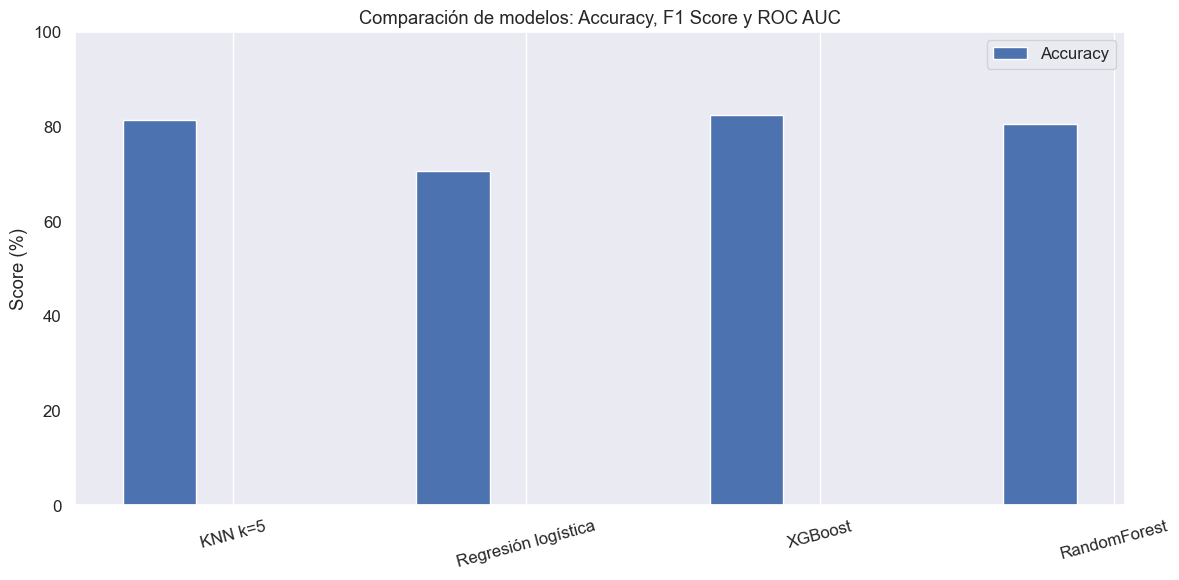

In [58]:
labels = df_comparacion["Modelo"]
accuracy = df_comparacion["Accuracy"]
f1 = df_comparacion["F1 Score"]
roc = df_comparacion["ROC AUC"]

x = range(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar([i - width for i in x], accuracy, width=width, label='Accuracy')
#plt.bar(x, f1, width=width, label='F1 Score')
#plt.bar([i + width for i in x], roc, width=width, label='ROC AUC')

plt.xticks(ticks=x, labels=labels, rotation=15)
plt.ylabel("Score (%)")
plt.title("Comparación de modelos: Accuracy, F1 Score y ROC AUC")
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

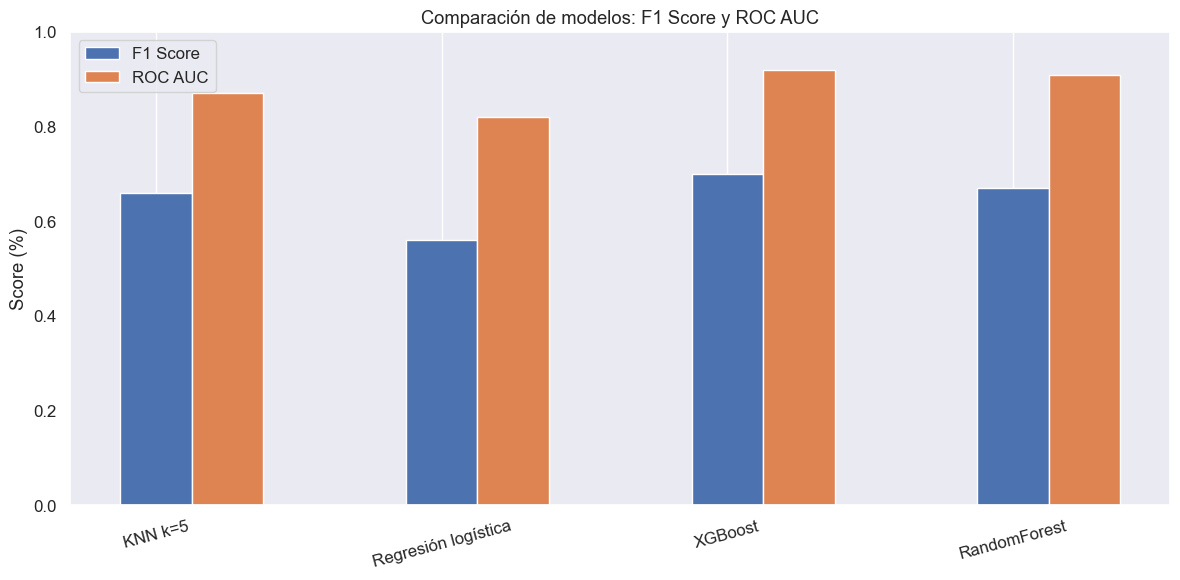

In [59]:
x = range(len(labels))
width = 0.25

plt.figure(figsize=(12, 6))
#plt.bar([i - width for i in x], accuracy, width=width, label='Accuracy')
plt.bar(x, f1, width=width, label='F1 Score')
plt.bar([i + width for i in x], roc, width=width, label='ROC AUC')

plt.xticks(ticks=x, labels=labels, rotation=15)
plt.ylabel("Score (%)")
plt.title("Comparación de modelos: F1 Score y ROC AUC")
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis="y")
plt.show()

# **CONCLUSIONES MODELACIÓN**

Se probaron cuatro modelos de clasificación para predecir la variable objetivo (`income_bin`) que representa si los ingresos de una persona son mayores o menores a 50K. 

#### **1. Resultados Obtenidos**
Los resultados de las métricas clave (Accuracy, F1 Score y ROC AUC) para cada modelo fueron los siguientes:

| Modelo                | Accuracy (%) | F1 Score | ROC AUC |
|-----------------------|--------------|----------|---------|
| **KNN (k=5)**         | 81.4         | 0.66     | 0.87    |
| **Regresión Logística** | 70.6         | 0.56     | 0.82    |
| **XGBoost**           | 82.4         | 0.70     | 0.92    |
| **Random Forest**     | 80.6         | 0.67     | 0.91    |

##### **Análisis por Modelo**
1. **KNN:**
     - **Ventajas:** Buen desempeño general con un Accuracy del 81.4% y un ROC AUC de 0.87, lo que indica una buena capacidad para distinguir entre clases.
     - **Desventajas:** Su F1 Score de 0.66 es inferior al de otros modelos, lo que sugiere que tiene dificultades para equilibrar precisión y sensibilidad, especialmente en un conjunto de datos desbalanceado.

2. **Regresión Logística:**
     - **Ventajas:** Es un modelo interpretable y eficiente.
     - **Desventajas:** Su Accuracy (70.6%) y F1 Score (0.56) fueron los más bajos entre los modelos evaluados, lo que indica que no es adecuado para este problema. Esto puede deberse a su incapacidad para capturar relaciones no lineales en los datos.

3. **XGBoost:**
     - **Ventajas:** Fue el modelo con mejor rendimiento en todas las métricas clave: Accuracy (82.4%), F1 Score (0.70) y ROC AUC (0.92). Su capacidad para manejar datos desbalanceados y capturar relaciones complejas lo hace ideal para este problema.
     - **Desventajas:** Es un modelo más complejo y requiere más tiempo de entrenamiento en comparación con otros modelos.

4. **Random Forest:**
     - **Ventajas:** Obtuvo un desempeño competitivo con un Accuracy del 80.6%, un F1 Score de 0.67 y un ROC AUC de 0.91. Es un modelo robusto y confiable.
     - **Desventajas:** Aunque su rendimiento fue cercano al de XGBoost, no logró superarlo en ninguna métrica.



#### **2. Conclusión**


El modelo **XGBoost** fue el que obtuvo el mejor rendimiento general, destacándose en todas las métricas clave. Su capacidad para manejar datos desbalanceados, capturar relaciones no lineales y ofrecer un alto rendimiento lo convierte en la mejor opción para este problema. Como alternativa confiable, el modelo **Random Forest** también mostró un desempeño sólido y puede considerarse una buena opción en caso de priorizar la interpretabilidad sobre el rendimiento máximo. Por otro lado, aunque **KNN** presentó un desempeño aceptable, su F1 Score más bajo indica que no es el modelo más adecuado para este caso. Finalmente, **la Regresión Logística**, pese a ser altamente interpretable, obtuvo los peores resultados y no resulta apropiada para este conjunto de datos.
